In [25]:
import os
import glob
import mne
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
from scipy.fft import rfft, rfftfreq
from string import ascii_letters
import seaborn as sns


Text(0.5, 1.0, 'Correlation Matrix')

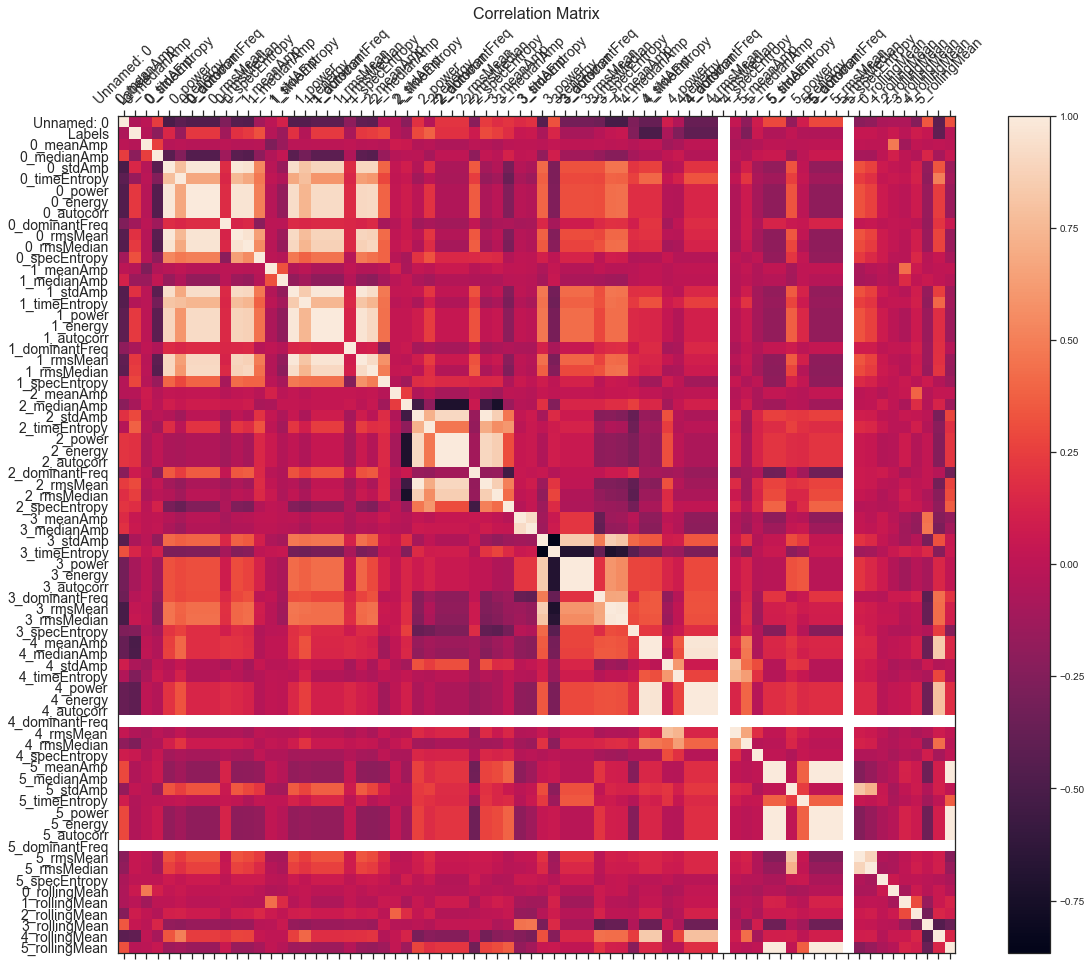

In [66]:
sns.set_theme(style="white")

# Generate a large random dataset
d = pd.read_csv('addedoutnew.csv')
d.drop([d.columns[1],d.columns[2],d.columns[3],d.columns[4],d.columns[5],d.columns[6]], axis=1, inplace = True)
# Step 1 - Make a scatter plot with square markers, set column names as labels

f = plt.figure(figsize=(19, 15))
plt.matshow(d.corr(), fignum=f.number)
plt.xticks(range(d.select_dtypes(['number']).shape[1]), d.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(d.select_dtypes(['number']).shape[1]), d.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix', fontsize=16)

#this tells us that the correlations we see within channels (the box areas) are highly similar for all signals

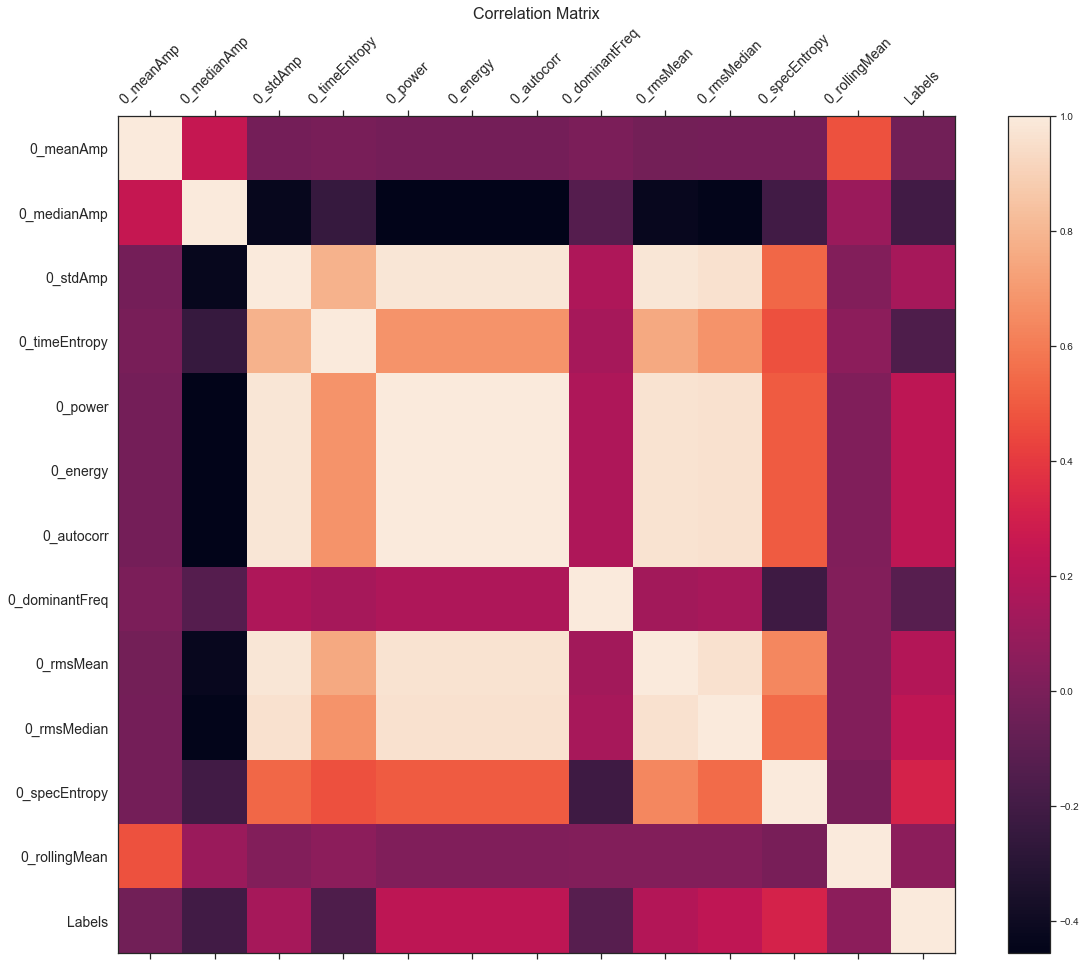

In [71]:
sns.set_theme(style="white")

# Generate a large random dataset
d = pd.read_csv('addedoutnew.csv')
d = d[["0_meanAmp", "0_medianAmp","0_stdAmp","0_timeEntropy","0_power","0_energy","0_autocorr","0_dominantFreq","0_rmsMean","0_rmsMedian", "0_specEntropy", "0_rollingMean","Labels"]]
# Step 1 - Make a scatter plot with square markers, set column names as labels

f = plt.figure(figsize=(19, 15))
plt.matshow(d.corr(), fignum=f.number)
plt.xticks(range(d.select_dtypes(['number']).shape[1]), d.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(d.select_dtypes(['number']).shape[1]), d.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix', fontsize=16);

Text(0.5, 1.0, 'Correlation Matrix')

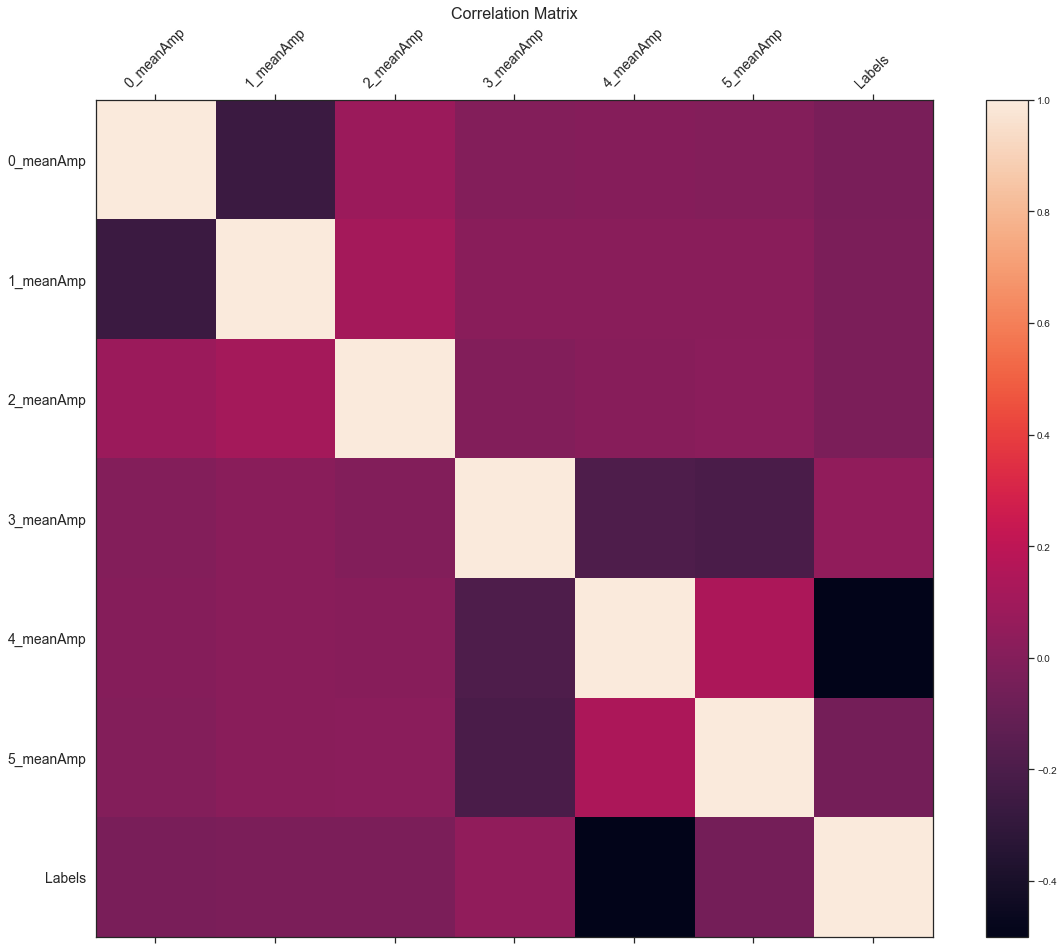

In [72]:
sns.set_theme(style="white")

# Generate a large random dataset
d = pd.read_csv('addedoutnew.csv')
d = d[["0_meanAmp", "1_meanAmp","2_meanAmp","3_meanAmp","4_meanAmp","5_meanAmp","Labels"]]
# Step 1 - Make a scatter plot with square markers, set column names as labels

f = plt.figure(figsize=(19, 15))
plt.matshow(d.corr(), fignum=f.number)
plt.xticks(range(d.select_dtypes(['number']).shape[1]), d.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(d.select_dtypes(['number']).shape[1]), d.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix', fontsize=16)

Text(0.5, 1.0, 'Correlation Matrix')

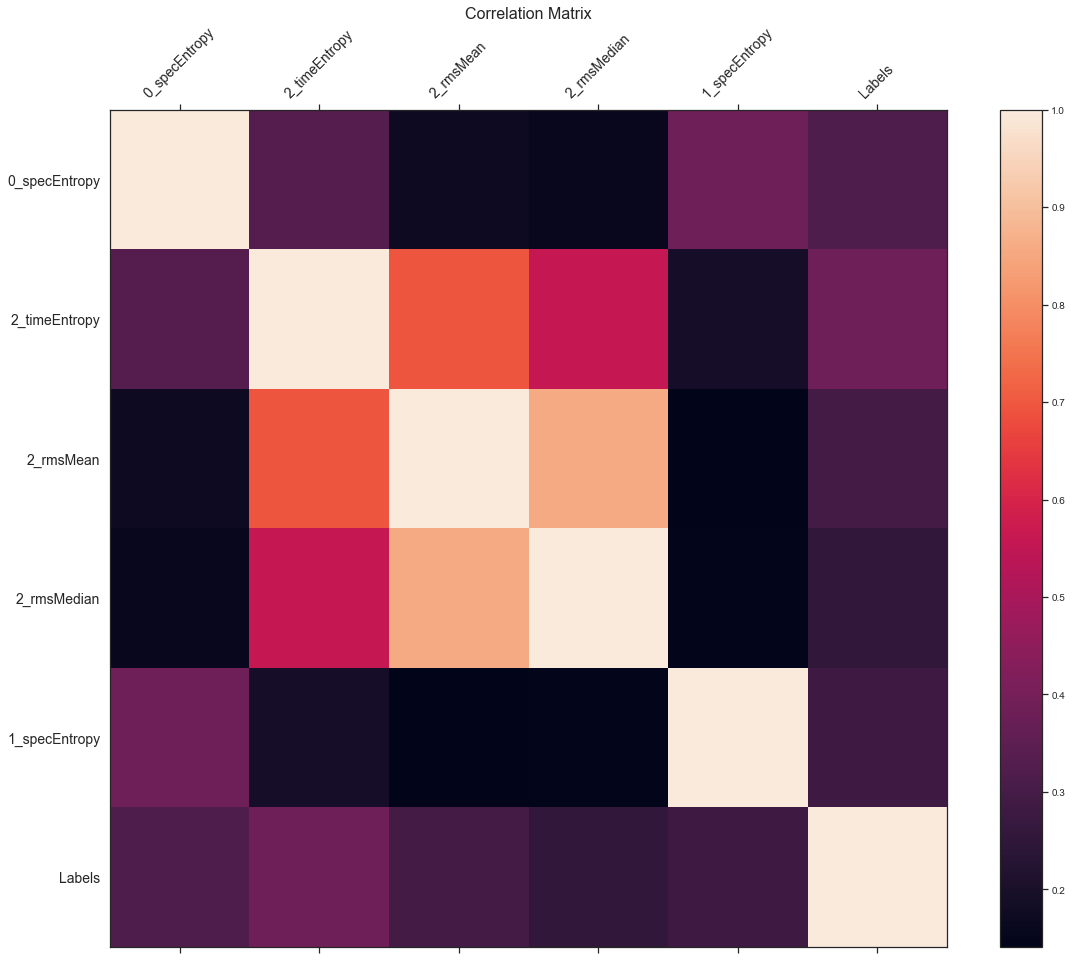

In [73]:
sns.set_theme(style="white")

# Generate a large random dataset
d = pd.read_csv('addedoutnew.csv')
d = d[["0_specEntropy","2_timeEntropy","2_rmsMean", "2_rmsMedian", "1_specEntropy","Labels"]]
# Step 1 - Make a scatter plot with square markers, set column names as labels

f = plt.figure(figsize=(19, 15))
plt.matshow(d.corr(), fignum=f.number)
plt.xticks(range(d.select_dtypes(['number']).shape[1]), d.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(d.select_dtypes(['number']).shape[1]), d.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix', fontsize=16)

In [90]:
def load_one_patient(filename_x, filename_y):
    arr = np.load(filename_x)
    arrlabels = np.load(filename_y)
    return arr, arrlabels
def make_frame(arr, arrlabels):
    df = pd.DataFrame(index=range(2650),columns=range(6))
    for i in range(0, 2650):
        for j in range(0, 6):
            df.at[i, j] = pd.Series(arr[i][j])
    df['Labels'] = pd.Series(arrlabels)
    return df
def driver():
    arr, arrlabels = load_one_patient('p00_n1_NEW_X.npy', "p00_n1_NEW_y.npy")
    df = make_frame(arr, arrlabels)
    return df
    
df = driver()
mask = df['Labels'] == (2)
twodf = df[~mask]
twodf = df.reset_index(drop = True)

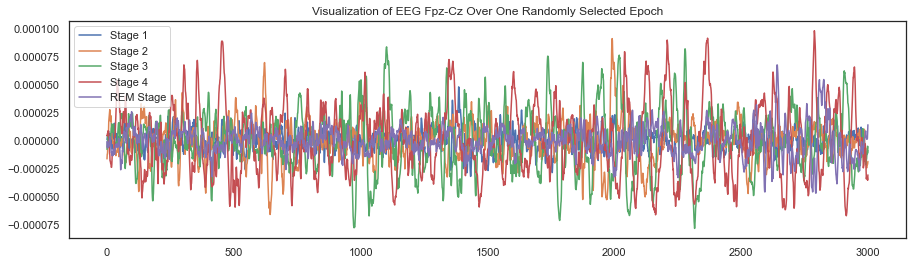

In [114]:
#plotting one channel all sleep stages
mask = df['Labels'] == (0 or 1)
df = df[~mask]
df = df.reset_index(drop = True)
plt.figure(figsize=(15, 4))
plt.title('Visualization of EEG Fpz-Cz Over One Randomly Selected Epoch')
plt.plot(df.iloc[0,0], label = 'Stage 1') #2 - stage 1
plt.plot(df.iloc[8,0], label = 'Stage 2') #3 - stage 2
plt.plot(df.iloc[20,0], label = 'Stage 3') #4 - stage 3
plt.plot(df.iloc[31,0], label = 'Stage 4') #5 - stage 4
plt.plot(df.iloc[198,0], label = 'REM Stage') #6 - Rem
plt.legend()


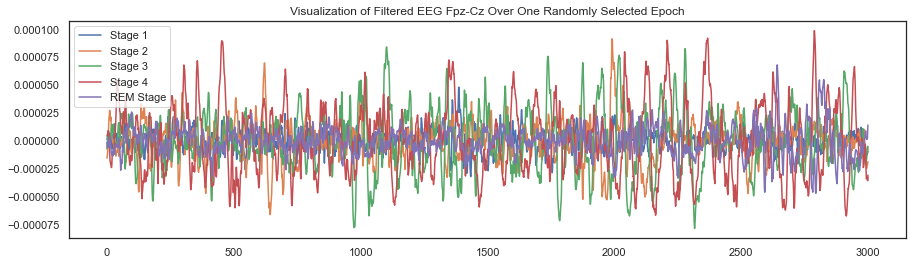

In [116]:
b, a = signal.iirnotch(50, 30, 100)
filtered_signal1 = signal.lfilter(b, a, df.iloc[0,0].values)
filtered_signal2 = signal.lfilter(b, a, df.iloc[8,0].values)
filtered_signal3 = signal.lfilter(b, a, df.iloc[20,0].values)
filtered_signal4 = signal.lfilter(b, a, df.iloc[31,0].values)
filtered_signal5 = signal.lfilter(b, a, df.iloc[198,0].values)
plt.figure(figsize=(15, 4))
plt.title('Visualization of Filtered EEG Fpz-Cz Over One Randomly Selected Epoch')
plt.plot(filtered_signal1, label = 'Stage 1')
plt.plot(filtered_signal2, label = 'Stage 2')
plt.plot(filtered_signal3, label = 'Stage 3')
plt.plot(filtered_signal4, label = 'Stage 4')
plt.plot(filtered_signal5, label = 'REM Stage')
plt.legend()

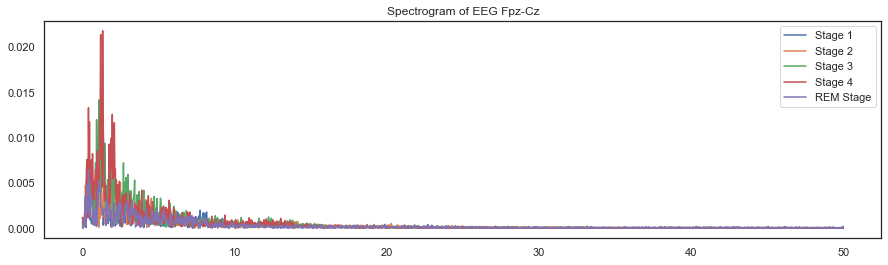

In [119]:
plt.figure(figsize=(15, 4))
frequencies = rfftfreq(len(df.iloc[0,0].values), 1/100)
magnitudes = np.abs(rfft(df.iloc[0,0].values))
plt.plot(frequencies, magnitudes, label = 'Stage 1')
magnitudes = np.abs(rfft(df.iloc[8,0].values))
plt.plot(frequencies, magnitudes, label = 'Stage 2')
magnitudes = np.abs(rfft(df.iloc[20,0].values))
plt.plot(frequencies, magnitudes, label = 'Stage 3')
magnitudes = np.abs(rfft(df.iloc[31,0].values))
plt.plot(frequencies, magnitudes, label = 'Stage 4')
magnitudes = np.abs(rfft(df.iloc[198,0].values))
plt.plot(frequencies, magnitudes, label = 'REM Stage')
plt.title('Spectrogram of EEG Fpz-Cz')
plt.legend()

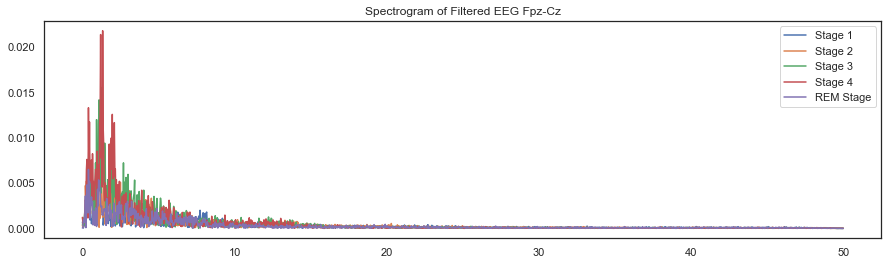

In [120]:
plt.figure(figsize=(15, 4))
frequencies = rfftfreq(len(filtered_signal1), 1/100)
magnitudes = np.abs(rfft(filtered_signal1))
plt.plot(frequencies, magnitudes, label = 'Stage 1')
magnitudes = np.abs(rfft(filtered_signal2))
plt.plot(frequencies, magnitudes, label = 'Stage 2')
magnitudes = np.abs(rfft(filtered_signal3))
plt.plot(frequencies, magnitudes, label = 'Stage 3')
magnitudes = np.abs(rfft(filtered_signal4))
plt.plot(frequencies, magnitudes, label = 'Stage 4')
magnitudes = np.abs(rfft(filtered_signal5))
plt.plot(frequencies, magnitudes, label = 'REM Stage')
plt.title('Spectrogram of Filtered EEG Fpz-Cz')
plt.legend()


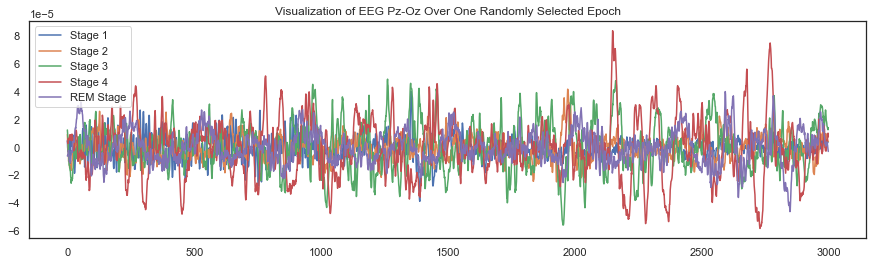

In [121]:
plt.figure(figsize=(15, 4))
plt.title('Visualization of EEG Pz-Oz Over One Randomly Selected Epoch')
plt.plot(df.iloc[0,1], label = 'Stage 1') #2 - stage 1
plt.plot(df.iloc[8,1], label = 'Stage 2') #3 - stage 2
plt.plot(df.iloc[20,1], label = 'Stage 3') #4 - stage 3
plt.plot(df.iloc[31,1], label = 'Stage 4') #5 - stage 4
plt.plot(df.iloc[198,1], label = 'REM Stage') #6 - Rem
plt.legend()

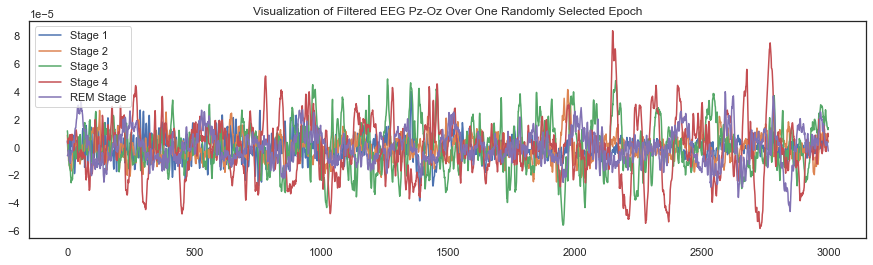

In [123]:
b, a = signal.iirnotch(50, 30, 100)
filtered_signal1 = signal.lfilter(b, a, df.iloc[0,1].values)
filtered_signal2 = signal.lfilter(b, a, df.iloc[8,1].values)
filtered_signal3 = signal.lfilter(b, a, df.iloc[20,1].values)
filtered_signal4 = signal.lfilter(b, a, df.iloc[31,1].values)
filtered_signal5 = signal.lfilter(b, a, df.iloc[198,1].values)
plt.figure(figsize=(15, 4))
plt.title('Visualization of Filtered EEG Pz-Oz Over One Randomly Selected Epoch')
plt.plot(filtered_signal1, label = 'Stage 1')
plt.plot(filtered_signal2, label = 'Stage 2')
plt.plot(filtered_signal3, label = 'Stage 3')
plt.plot(filtered_signal4, label = 'Stage 4')
plt.plot(filtered_signal5, label = 'REM Stage')
plt.legend()

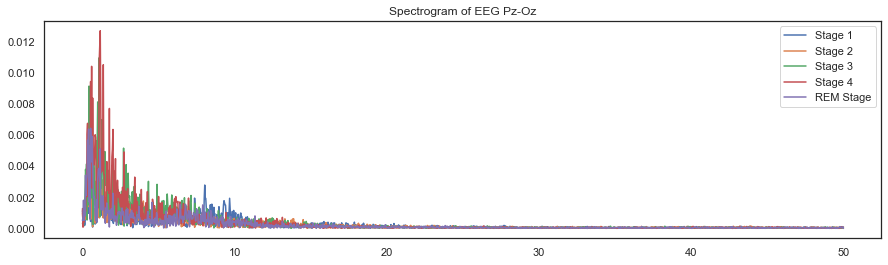

In [125]:
plt.figure(figsize=(15, 4))
frequencies = rfftfreq(len(df.iloc[0,1].values), 1/100)
magnitudes = np.abs(rfft(df.iloc[0,1].values))
plt.plot(frequencies, magnitudes, label = 'Stage 1')
magnitudes = np.abs(rfft(df.iloc[8,1].values))
plt.plot(frequencies, magnitudes, label = 'Stage 2')
magnitudes = np.abs(rfft(df.iloc[20,1].values))
plt.plot(frequencies, magnitudes, label = 'Stage 3')
magnitudes = np.abs(rfft(df.iloc[31,1].values))
plt.plot(frequencies, magnitudes, label = 'Stage 4')
magnitudes = np.abs(rfft(df.iloc[198,1].values))
plt.plot(frequencies, magnitudes, label = 'REM Stage')
plt.title('Spectrogram of EEG Pz-Oz')
plt.legend()

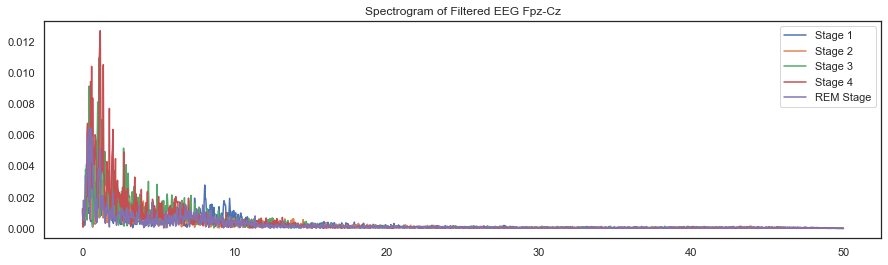

In [126]:
plt.figure(figsize=(15, 4))
frequencies = rfftfreq(len(filtered_signal1), 1/100)
magnitudes = np.abs(rfft(filtered_signal1))
plt.plot(frequencies, magnitudes, label = 'Stage 1')
magnitudes = np.abs(rfft(filtered_signal2))
plt.plot(frequencies, magnitudes, label = 'Stage 2')
magnitudes = np.abs(rfft(filtered_signal3))
plt.plot(frequencies, magnitudes, label = 'Stage 3')
magnitudes = np.abs(rfft(filtered_signal4))
plt.plot(frequencies, magnitudes, label = 'Stage 4')
magnitudes = np.abs(rfft(filtered_signal5))
plt.plot(frequencies, magnitudes, label = 'REM Stage')
plt.title('Spectrogram of Filtered EEG Pz-oz')
plt.legend()

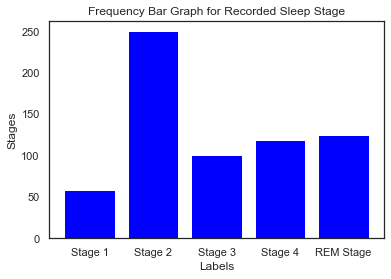

In [135]:
df = pd.read_csv('addedoutnew.csv')
from collections import Counter
label_counts = Counter(df['Labels'].tolist())

# Extract labels and frequencies
labels = ['Stage 1', 'Stage 2', 'Stage 3', 'Stage 4', 'REM Stage']
frequencies = list(label_counts.values())

# Create a bar graph
plt.bar(labels, frequencies, color='blue')

# Add labels and title
plt.xlabel('Labels')
plt.ylabel('Stages')
plt.title('Frequency Bar Graph for Recorded Sleep Stage')

# Show the plot
plt.show()

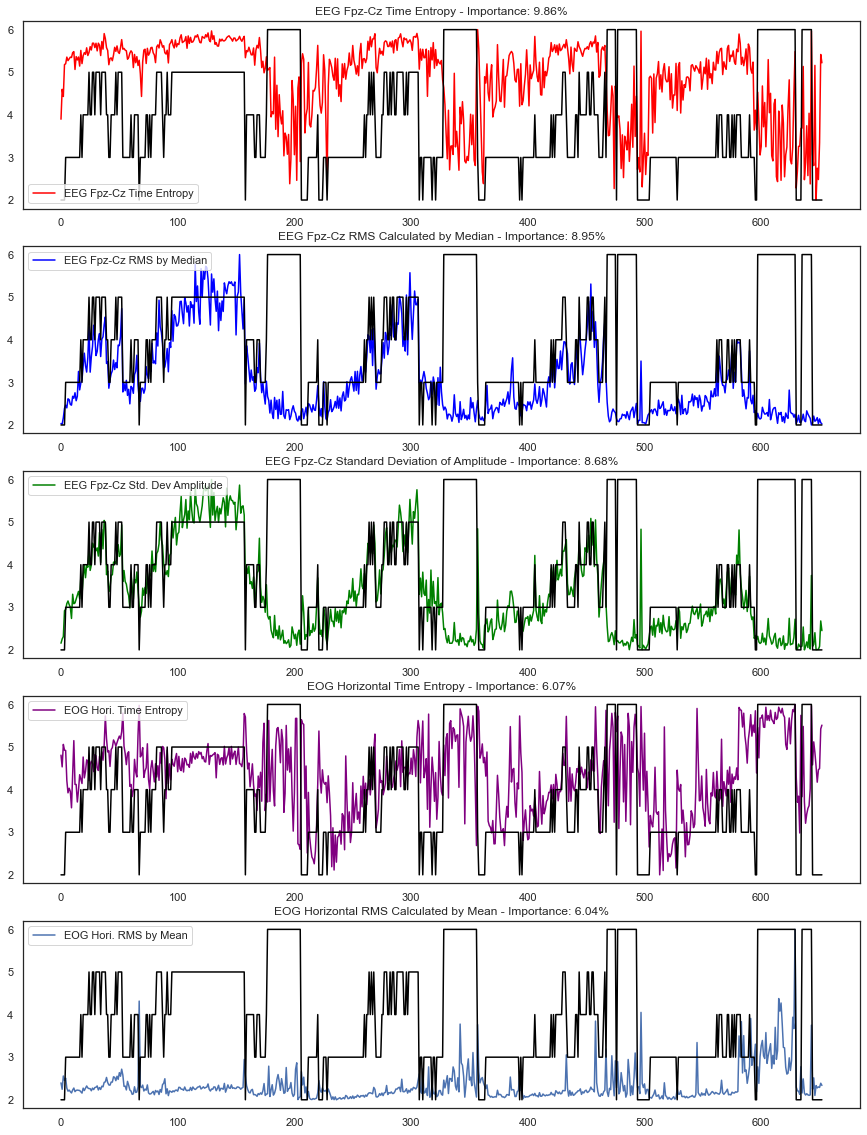

In [161]:
from sklearn.preprocessing import MinMaxScaler
fig, axes = plt.subplots(5, 1, figsize=(15, 20))
scaler = MinMaxScaler(feature_range=(2, 6))
scaled = scaler.fit_transform(df['0_timeEntropy'].to_numpy().reshape(-1,1))
axes[0].plot(scaled, label = "EEG Fpz-Cz Time Entropy", color = 'red')
axes[0].set_title('EEG Fpz-Cz Time Entropy - Importance: 9.86%')
scaled = scaler.fit_transform(df['0_rmsMedian'].to_numpy().reshape(-1,1))
axes[1].plot(scaled, label = 'EEG Fpz-Cz RMS by Median', color = 'blue')
axes[1].set_title('EEG Fpz-Cz RMS Calculated by Median - Importance: 8.95%')
scaled = scaler.fit_transform(df['0_stdAmp'].to_numpy().reshape(-1,1))
axes[2].plot(scaled, label = 'EEG Fpz-Cz Std. Dev Amplitude', color = 'green')
axes[2].set_title('EEG Fpz-Cz Standard Deviation of Amplitude - Importance: 8.68%')
scaled = scaler.fit_transform(df['2_timeEntropy'].to_numpy().reshape(-1,1))
axes[3].plot(scaled, label = "EOG Hori. Time Entropy", color = 'purple')
axes[3].set_title('EOG Horizontal Time Entropy - Importance: 6.07%')
scaled = scaler.fit_transform(df['2_rmsMean'].to_numpy().reshape(-1,1))
axes[4].plot(scaled, label = 'EOG Hori. RMS by Mean')
axes[4].set_title('EOG Horizontal RMS Calculated by Mean - Importance: 6.04%')
axes[0].plot(df['Labels'], color = 'black')
axes[1].plot(df['Labels'], color = 'black')
axes[2].plot(df['Labels'], color = 'black')
axes[3].plot(df['Labels'], color = 'black')
axes[4].plot(df['Labels'], color = 'black')
axes[0].legend()
axes[1].legend()
axes[2].legend()
axes[3].legend()
axes[4].legend()


Unnamed: 0                                                       0
0                0       0.000001\n1       0.000003\n2       0....
1                0       4.922344e-06\n1       2.783883e-08\n2 ...
2                0       0.000015\n1       0.000010\n2       0....
3                0       215.000000\n1       215.247168\n2     ...
                                       ...                        
1_rollingMean                                                  NaN
2_rollingMean                                                  NaN
3_rollingMean                                                  NaN
4_rollingMean                                                  NaN
5_rollingMean                                                  NaN
Name: 0, Length: 80, dtype: object

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


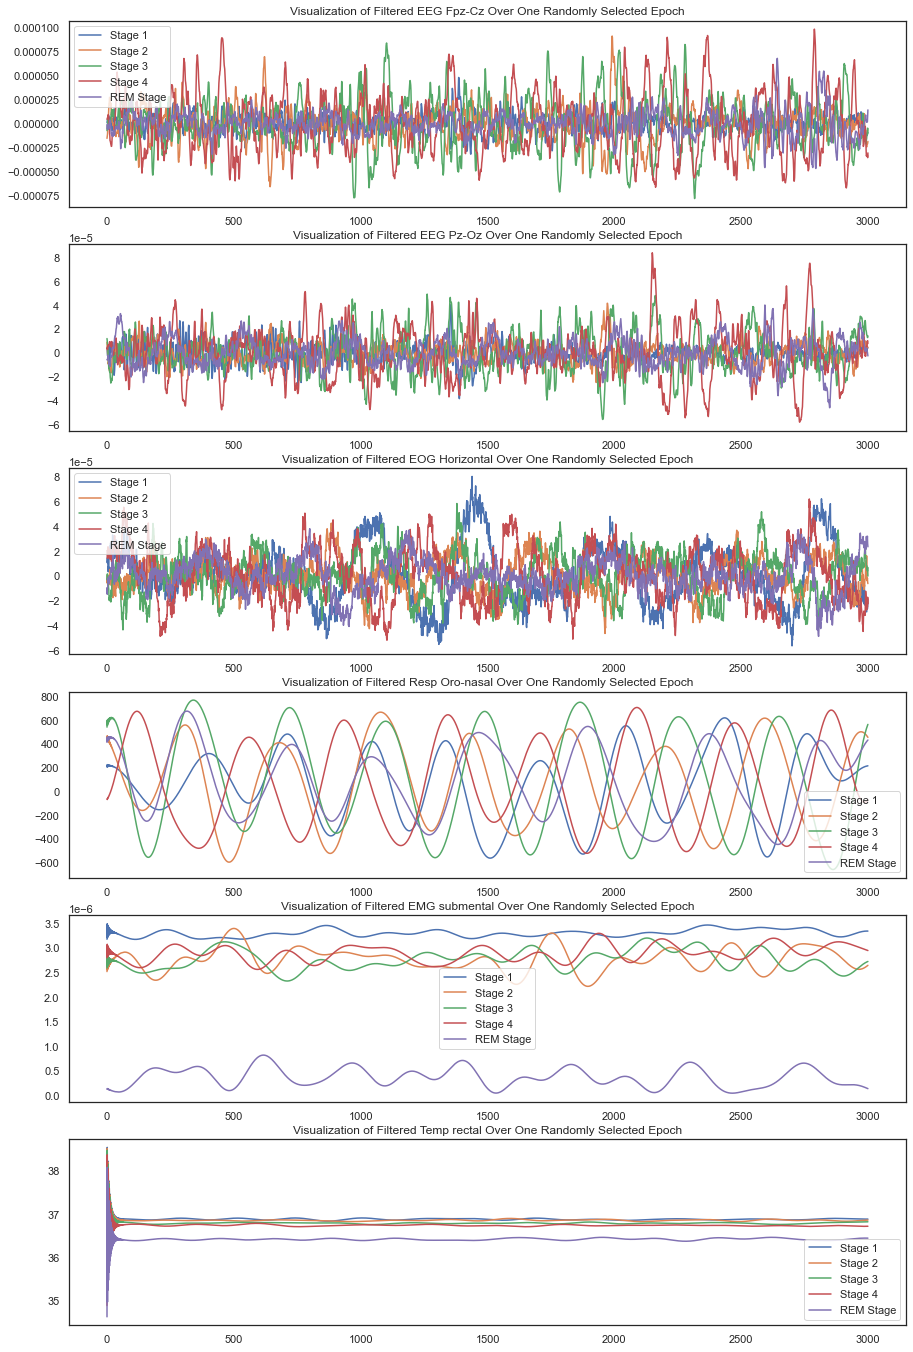

In [168]:
fig, axes = plt.subplots(6, 1, figsize=(15, 24))
df = driver()
mask = df['Labels'] == (0 or 1)
df = df[~mask]
df = df.reset_index(drop = True)

b, a = signal.iirnotch(50, 30, 100)
filtered_signal1 = signal.lfilter(b, a, df.iloc[0,0].values)
filtered_signal2 = signal.lfilter(b, a, df.iloc[8,0].values)
filtered_signal3 = signal.lfilter(b, a, df.iloc[20,0].values)
filtered_signal4 = signal.lfilter(b, a, df.iloc[31,0].values)
filtered_signal5 = signal.lfilter(b, a, df.iloc[198,0].values)
axes[0].set_title('Visualization of Filtered EEG Fpz-Cz Over One Randomly Selected Epoch')
axes[0].plot(filtered_signal1, label = 'Stage 1')
axes[0].plot(filtered_signal2, label = 'Stage 2')
axes[0].plot(filtered_signal3, label = 'Stage 3')
axes[0].plot(filtered_signal4, label = 'Stage 4')
axes[0].plot(filtered_signal5, label = 'REM Stage')
axes[0].legend()

filtered_signal1 = signal.lfilter(b, a, df.iloc[0,1].values)
filtered_signal2 = signal.lfilter(b, a, df.iloc[8,1].values)
filtered_signal3 = signal.lfilter(b, a, df.iloc[20,1].values)
filtered_signal4 = signal.lfilter(b, a, df.iloc[31,1].values)
filtered_signal5 = signal.lfilter(b, a, df.iloc[198,1].values)
axes[1].set_title('Visualization of Filtered EEG Pz-Oz Over One Randomly Selected Epoch')
axes[1].plot(filtered_signal1, label = 'Stage 1')
axes[1].plot(filtered_signal2, label = 'Stage 2')
axes[1].plot(filtered_signal3, label = 'Stage 3')
axes[1].plot(filtered_signal4, label = 'Stage 4')
axes[1].plot(filtered_signal5, label = 'REM Stage')
plt.legend()

filtered_signal1 = signal.lfilter(b, a, df.iloc[0,2].values)
filtered_signal2 = signal.lfilter(b, a, df.iloc[8,2].values)
filtered_signal3 = signal.lfilter(b, a, df.iloc[20,2].values)
filtered_signal4 = signal.lfilter(b, a, df.iloc[31,2].values)
filtered_signal5 = signal.lfilter(b, a, df.iloc[198,2].values)
axes[2].set_title('Visualization of Filtered EOG Horizontal Over One Randomly Selected Epoch')
axes[2].plot(filtered_signal1, label = 'Stage 1')
axes[2].plot(filtered_signal2, label = 'Stage 2')
axes[2].plot(filtered_signal3, label = 'Stage 3')
axes[2].plot(filtered_signal4, label = 'Stage 4')
axes[2].plot(filtered_signal5, label = 'REM Stage')
axes[2].legend()

filtered_signal1 = signal.lfilter(b, a, df.iloc[0,3].values)
filtered_signal2 = signal.lfilter(b, a, df.iloc[8,3].values)
filtered_signal3 = signal.lfilter(b, a, df.iloc[20,3].values)
filtered_signal4 = signal.lfilter(b, a, df.iloc[31,3].values)
filtered_signal5 = signal.lfilter(b, a, df.iloc[198,3].values)
axes[3].set_title('Visualization of Filtered Resp Oro-nasal Over One Randomly Selected Epoch')
axes[3].plot(filtered_signal1, label = 'Stage 1')
axes[3].plot(filtered_signal2, label = 'Stage 2')
axes[3].plot(filtered_signal3, label = 'Stage 3')
axes[3].plot(filtered_signal4, label = 'Stage 4')
axes[3].plot(filtered_signal5, label = 'REM Stage')
axes[3].legend()

filtered_signal1 = signal.lfilter(b, a, df.iloc[0,4].values)
filtered_signal2 = signal.lfilter(b, a, df.iloc[8,4].values)
filtered_signal3 = signal.lfilter(b, a, df.iloc[20,4].values)
filtered_signal4 = signal.lfilter(b, a, df.iloc[31,4].values)
filtered_signal5 = signal.lfilter(b, a, df.iloc[198,4].values)
axes[4].set_title('Visualization of Filtered EMG submental Over One Randomly Selected Epoch')
axes[4].plot(filtered_signal1, label = 'Stage 1')
axes[4].plot(filtered_signal2, label = 'Stage 2')
axes[4].plot(filtered_signal3, label = 'Stage 3')
axes[4].plot(filtered_signal4, label = 'Stage 4')
axes[4].plot(filtered_signal5, label = 'REM Stage')
axes[4].legend()

filtered_signal1 = signal.lfilter(b, a, df.iloc[0,5].values)
filtered_signal2 = signal.lfilter(b, a, df.iloc[8,5].values)
filtered_signal3 = signal.lfilter(b, a, df.iloc[20,5].values)
filtered_signal4 = signal.lfilter(b, a, df.iloc[31,5].values)
filtered_signal5 = signal.lfilter(b, a, df.iloc[198,5].values)
axes[5].set_title('Visualization of Filtered Temp rectal Over One Randomly Selected Epoch')
axes[5].plot(filtered_signal1, label = 'Stage 1')
axes[5].plot(filtered_signal2, label = 'Stage 2')
axes[5].plot(filtered_signal3, label = 'Stage 3')
axes[5].plot(filtered_signal4, label = 'Stage 4')
axes[5].plot(filtered_signal5, label = 'REM Stage')
axes[5].legend()

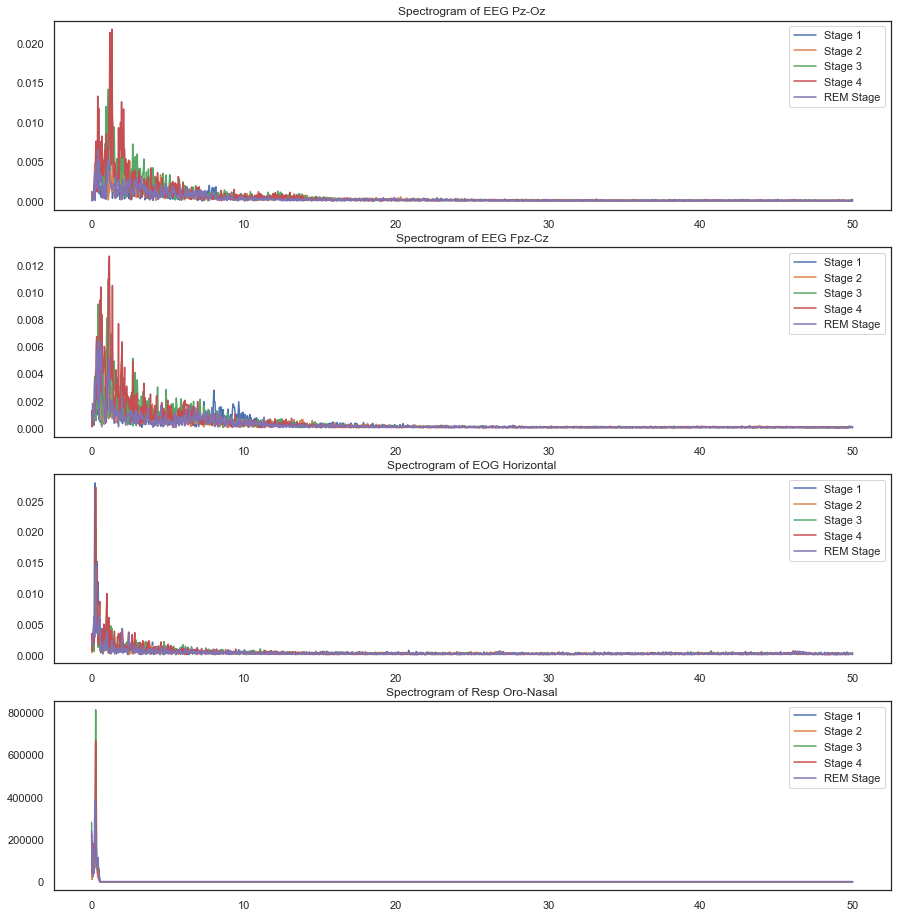

In [171]:
fig, axes = plt.subplots(4, 1, figsize=(15, 16))

frequencies = rfftfreq(len(df.iloc[0,0].values), 1/100)
magnitudes = np.abs(rfft(df.iloc[0,0].values))
axes[0].plot(frequencies, magnitudes, label = 'Stage 1')
magnitudes = np.abs(rfft(df.iloc[8,0].values))
axes[0].plot(frequencies, magnitudes, label = 'Stage 2')
magnitudes = np.abs(rfft(df.iloc[20,0].values))
axes[0].plot(frequencies, magnitudes, label = 'Stage 3')
magnitudes = np.abs(rfft(df.iloc[31,0].values))
axes[0].plot(frequencies, magnitudes, label = 'Stage 4')
magnitudes = np.abs(rfft(df.iloc[198,0].values))
axes[0].plot(frequencies, magnitudes, label = 'REM Stage')
axes[0].set_title('Spectrogram of EEG Pz-Oz')
axes[0].legend()

frequencies = rfftfreq(len(df.iloc[0,1].values), 1/100)
magnitudes = np.abs(rfft(df.iloc[0,1].values))
axes[1].plot(frequencies, magnitudes, label = 'Stage 1')
magnitudes = np.abs(rfft(df.iloc[8,1].values))
axes[1].plot(frequencies, magnitudes, label = 'Stage 2')
magnitudes = np.abs(rfft(df.iloc[20,1].values))
axes[1].plot(frequencies, magnitudes, label = 'Stage 3')
magnitudes = np.abs(rfft(df.iloc[31,1].values))
axes[1].plot(frequencies, magnitudes, label = 'Stage 4')
magnitudes = np.abs(rfft(df.iloc[198,1].values))
axes[1].plot(frequencies, magnitudes, label = 'REM Stage')
axes[1].set_title('Spectrogram of EEG Fpz-Cz')
axes[1].legend()

frequencies = rfftfreq(len(df.iloc[0,2].values), 1/100)
magnitudes = np.abs(rfft(df.iloc[0,2].values))
axes[2].plot(frequencies, magnitudes, label = 'Stage 1')
magnitudes = np.abs(rfft(df.iloc[8,2].values))
axes[2].plot(frequencies, magnitudes, label = 'Stage 2')
magnitudes = np.abs(rfft(df.iloc[20,2].values))
axes[2].plot(frequencies, magnitudes, label = 'Stage 3')
magnitudes = np.abs(rfft(df.iloc[31,2].values))
axes[2].plot(frequencies, magnitudes, label = 'Stage 4')
magnitudes = np.abs(rfft(df.iloc[198,2].values))
axes[2].plot(frequencies, magnitudes, label = 'REM Stage')
axes[2].set_title('Spectrogram of EOG Horizontal')
axes[2].legend()

frequencies = rfftfreq(len(df.iloc[0,3].values), 1/100)
magnitudes = np.abs(rfft(df.iloc[0,3].values))
axes[3].plot(frequencies, magnitudes, label = 'Stage 1')
magnitudes = np.abs(rfft(df.iloc[8,3].values))
axes[3].plot(frequencies, magnitudes, label = 'Stage 2')
magnitudes = np.abs(rfft(df.iloc[20,3].values))
axes[3].plot(frequencies, magnitudes, label = 'Stage 3')
magnitudes = np.abs(rfft(df.iloc[31,3].values))
axes[3].plot(frequencies, magnitudes, label = 'Stage 4')
magnitudes = np.abs(rfft(df.iloc[198,3].values))
axes[3].plot(frequencies, magnitudes, label = 'REM Stage')
axes[3].set_title('Spectrogram of Resp Oro-Nasal')
axes[3].legend()

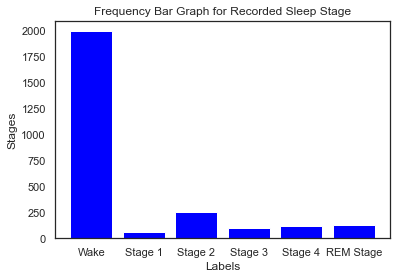

In [172]:

df = driver()
label_counts = Counter(df['Labels'].tolist())

# Extract labels and frequencies
labels = ['Wake','Stage 1', 'Stage 2', 'Stage 3', 'Stage 4', 'REM Stage']
frequencies = list(label_counts.values())

# Create a bar graph
plt.bar(labels, frequencies, color='blue')

# Add labels and title
plt.xlabel('Labels')
plt.ylabel('Stages')
plt.title('Frequency Bar Graph for Recorded Sleep Stage')

# Show the plot
plt.show()